In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, OrdinalEncoder

from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')

In [199]:
df_train = pd.read_csv("VirtualIntership/hcdr/application_train.csv")
print("Shape training data: ", df_train.shape)
#print(df_train.columns.tolist())
df_train.head(5)

Shape training data:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
df_test = pd.read_csv("VirtualIntership/hcdr/application_test.csv")
print("Shape testing data: ", df_test.shape)
#print(df_test.columns.tolist())
df_test.head(5)

Shape testing data:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
# Checking if there are missing values and if futher analysis is needed
df_train.isna().any().any()

True

In [202]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: "Missing Values", 1: "% of Total Values"}
    )

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = (
        mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0]
        .sort_values("% of Total Values", ascending=False)
        .round(1)
    )
    
    print(
        "Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are "
        + str(mis_val_table_ren_columns.shape[0])
        + " columns that have missing values."
    )
    
    return mis_val_table_ren_columns

In [203]:
missing_values = missing_values_table(df_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


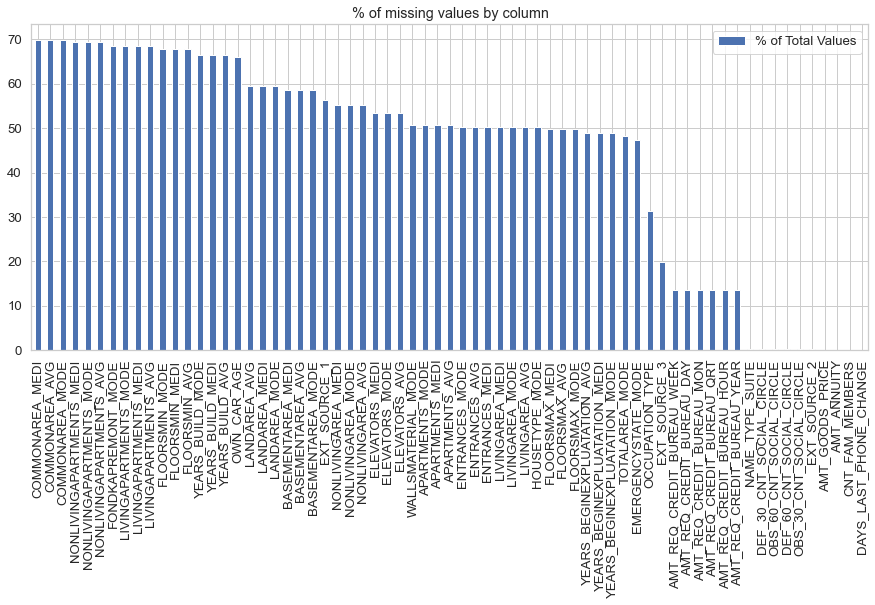

In [204]:
# Visual representation
missing_values[missing_values["Missing Values"] > 0.0].drop(
    "Missing Values", axis=1
).plot(kind="bar", figsize=(15, 6), title="% of missing values by column")

plt.show()

In [205]:
# Calculating missing values by class and adding a new column "Class"
missing_values_0 = missing_values_table(df_train[df_train["TARGET"] == 0])
missing_values_1 = missing_values_table(df_train[df_train["TARGET"] == 1])
missing_values_0["Class"] = 0
missing_values_1["Class"] = 1

missing_values = missing_values_0.append(missing_values_1)

missing_values = missing_values[missing_values["Missing Values"] > 0.0]
missing_values.head()

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.
Your selected dataframe has 122 columns.
There are 64 columns that have missing values.


,Missing Values,% of Total Values,Class
COMMONAREA_MEDI,196442,69.5,0
COMMONAREA_AVG,196442,69.5,0
COMMONAREA_MODE,196442,69.5,0
NONLIVINGAPARTMENTS_MEDI,195187,69.0,0
NONLIVINGAPARTMENTS_MODE,195187,69.0,0


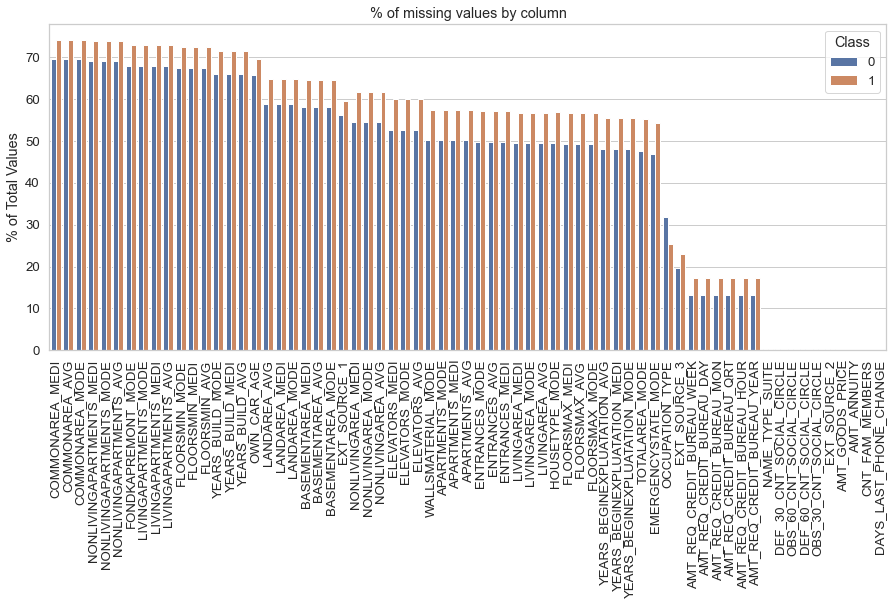

In [206]:
# Visual representation
plt.figure(figsize=(15, 6))

sns.barplot(
    x=missing_values.index,
    y=missing_values["% of Total Values"],
    data=missing_values,
    hue="Class",
)

plt.title("% of missing values by column")
plt.xticks(rotation=90)
plt.legend(loc="upper right", title="Class")
plt.show()

Target Distribution:
0    282686
1     24825
Name: TARGET, dtype: int64


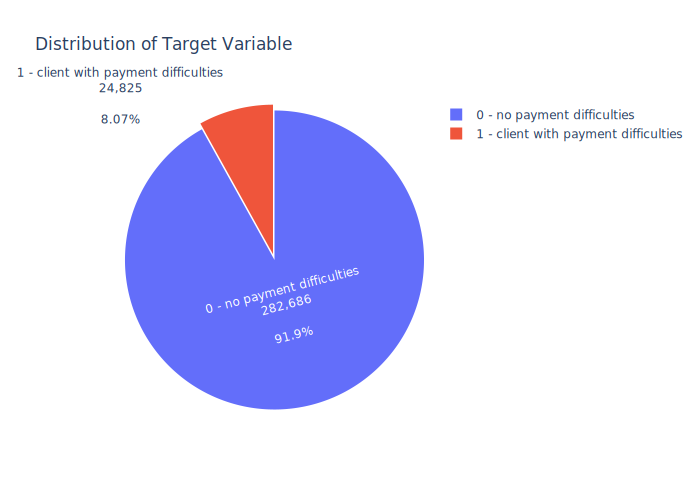

In [207]:
target_distribution = df_train.TARGET.value_counts()
print("Target Distribution:")
print(target_distribution)

labels = ['0 - no payment difficulties', '1 - client with payment difficulties']

fig = go.Figure(data = [
        go.Pie(values = target_distribution, labels = labels, textinfo = 'label+percent+value' , pull = [0,0.04])], 
         layout = go.Layout(title = 'Distribution of Target Variable'))

fig.show(renderer = 'svg')

In [208]:
def plot_categorical_variables_bar(data, column_name, figsize = (18,6), 
                                   percentage_display = True, plot_defaulter = True, 
                                   rotation = 0, horizontal_adjust = 0, fontsize_percent = 'xx-small'):
    
    print(f"Total Number of unique categories of {column_name} = {len(data[column_name].unique())}")
    
    plt.figure(figsize = figsize, tight_layout = False)
    sns.set(style = 'whitegrid', font_scale = 1.2)
    
    #plotting overall distribution of category
    plt.subplot(1,2,1)
    data_to_plot = data[column_name].value_counts().sort_values(ascending = False)
    ax = sns.barplot(x = data_to_plot.index, y = data_to_plot, palette = 'Set1')
    
    if percentage_display:
        total_datapoints = len(data[column_name].dropna())
        for p in ax.patches:
            ax.text(p.get_x() + horizontal_adjust, p.get_height() + 0.005 * total_datapoints, '{:1.02f}%'.format(p.get_height() * 100 / total_datapoints), fontsize = fontsize_percent)
        
    plt.xlabel(column_name, labelpad = 10)
    plt.title(f'Distribution of {column_name}', pad = 20)
    plt.xticks(rotation = rotation)
    plt.ylabel('Counts')
    plt.show()

In [209]:
def plot_categorical_variables_bar_target(data, column_name, figsize = (18,6), 
                                   percentage_display = True, plot_defaulter = True, 
                                   rotation = 0, horizontal_adjust = 0, fontsize_percent = 'xx-small'):
    #plotting distribution of category for Defaulters
    
    plt.figure(figsize = figsize, tight_layout = False)
    sns.set(style = 'whitegrid', font_scale = 1.2)

    percentage_defaulter_target_0 = (data[column_name][data.TARGET == 0].value_counts())
    
    plt.subplot(1,2,1)
    sns.barplot(x = percentage_defaulter_target_0.index, y = percentage_defaulter_target_0, palette = 'Set2')
    plt.ylabel('Counts')
    plt.xlabel(column_name, labelpad = 10)
    plt.xticks(rotation = rotation)
    plt.title(f'Distribution of Target 0 \n for {column_name}', pad = 20)
    
    percentage_defaulter_target_1 = (data[column_name][data.TARGET == 1].value_counts())

    plt.subplot(1,2,2)
    sns.barplot(x = percentage_defaulter_target_1.index, y = percentage_defaulter_target_1, palette = 'Set2')
    plt.ylabel('Counts')
    plt.xlabel(column_name, labelpad = 10)
    plt.xticks(rotation = rotation)
    plt.title(f'Distribution of Target 1 \n for {column_name}', pad = 20)
plt.show()

In [210]:
def plot_categorical_variables_pie(data, column_name, plot_defaulter = True, hole = 0):

    
    if plot_defaulter:
        cols = 3
        specs = [[{'type' : 'domain'}, {'type' : 'domain'}, {'type' : 'domain'}]]
        titles = [f'All Targets', f'Percentage Target 0 ', f'Percentage Target 1']
    else:
        cols = 1
        specs = [[{'type': 'domain'}]]
        titles = [f'All Targets']
        
    values_categorical = data[column_name].value_counts()
    labels_categorical = values_categorical.index
    
    fig = make_subplots(rows = 1, cols = cols, 
                       specs = specs, 
                       subplot_titles = titles)
    
    fig.add_trace(go.Pie(values = values_categorical, labels = labels_categorical, hole = hole, 
                         textinfo = 'label+percent', textposition = 'inside'), row = 1, col = 1)
    
    if plot_defaulter:
        percentage_defaulter_per_category = data[column_name][data.TARGET == 0].value_counts()
        percentage_defaulter_per_category.dropna(inplace = True)
        percentage_defaulter_per_category = percentage_defaulter_per_category.round(2)
        
        fig.add_trace(go.Pie(values = percentage_defaulter_per_category, labels = percentage_defaulter_per_category.index, 
                             hole = hole, textinfo = 'label+value', hoverinfo = 'label+value'), row = 1, col = 2)
        percentage_defaulter_per_category = data[column_name][data.TARGET == 1].value_counts()
        percentage_defaulter_per_category.dropna(inplace = True)
        percentage_defaulter_per_category = percentage_defaulter_per_category.round(2)
        
        fig.add_trace(go.Pie(values = percentage_defaulter_per_category, labels = percentage_defaulter_per_category.index, 
                             hole = hole, textinfo = 'label+value', hoverinfo = 'label+value'), row = 1, col = 3)
        
    fig.update_layout(title = f'Distribution of {column_name}')
    fig.show()

In [211]:
def print_unique_categories(data, column_name, show_counts = False):
        
    print('-'*100)
    print(f"The unique categories of '{column_name}' are:\n{data[column_name].unique()}")
    print('-'*100)
    
    if show_counts:
        print(f"Counts of each category are:\n{data[column_name].value_counts()}")
        print('-'*100)
        print(f"Counts of Target 0 are:\n{data[column_name][data.TARGET == 0].value_counts()}")
        print('-'*100)
        print(f"Counts of Target 1 are:\n{data[column_name][data.TARGET == 1].value_counts()}")
        print('-'*100)

In [212]:
#let us first see the unique categories of 'CODE_GENDER'
print_unique_categories(df_train, 'CODE_GENDER', show_counts = True)

#plotting the Pie Plot for the Column
plot_categorical_variables_pie(df_train, 'CODE_GENDER', hole = 0.5)
print('-'*100)

----------------------------------------------------------------------------------------------------
The unique categories of 'CODE_GENDER' are:
['M' 'F' 'XNA']
----------------------------------------------------------------------------------------------------
Counts of each category are:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
----------------------------------------------------------------------------------------------------
Counts of Target 0 are:
F      188278
M       94404
XNA         4
Name: CODE_GENDER, dtype: int64
----------------------------------------------------------------------------------------------------
Counts of Target 1 are:
F    14170
M    10655
Name: CODE_GENDER, dtype: int64
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_CONTRACT_TYPE' are:
['Cash loans' 'Revolving loans']
----------------------------------------------------------------------------------------------------
Counts of each category are:
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
----------------------------------------------------------------------------------------------------
Counts of Target 0 are:
Cash loans         255011
Revolving loans     27675
Name: NAME_CONTRACT_TYPE, dtype: int64
----------------------------------------------------------------------------------------------------
Counts of Target 1 are:
Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64
----------------------------------------------------------------------------------------------------
Total Number of unique categories of NAME_CONTRACT_TYPE = 2


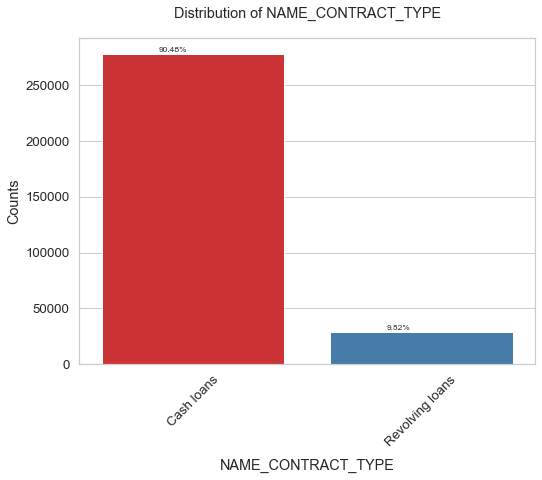

----------------------------------------------------------------------------------------------------


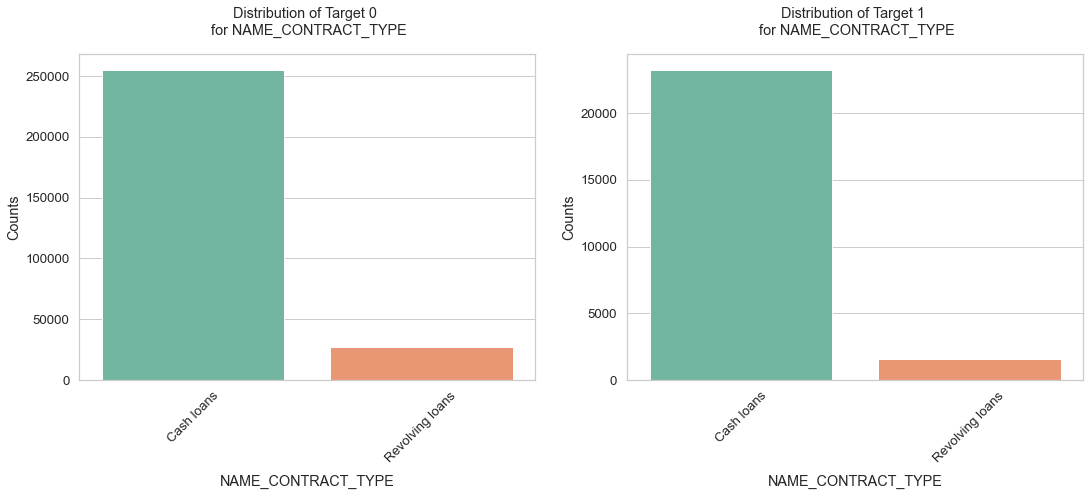

In [213]:
#let us first see the unique categories of 'NAME_CONTRACT_TYPE'
print_unique_categories(df_train, 'NAME_CONTRACT_TYPE', show_counts = True)

#plotting the Bar Plot for the Column
plot_categorical_variables_bar(df_train, column_name = 'NAME_CONTRACT_TYPE', rotation = 45, horizontal_adjust = 0.25)

plot_categorical_variables_bar_target(df_train, column_name = 'NAME_CONTRACT_TYPE', rotation = 45, horizontal_adjust = 0.25)
print('-'*100)

----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_FAMILY_STATUS' are:
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
----------------------------------------------------------------------------------------------------
Counts of each category are:
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64
----------------------------------------------------------------------------------------------------
Counts of Target 0 are:
Married                 181582
Single / not married     40987
Civil marriage           26814
Separated                18150
Widow                    15151
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64
------------------------------------------------------------

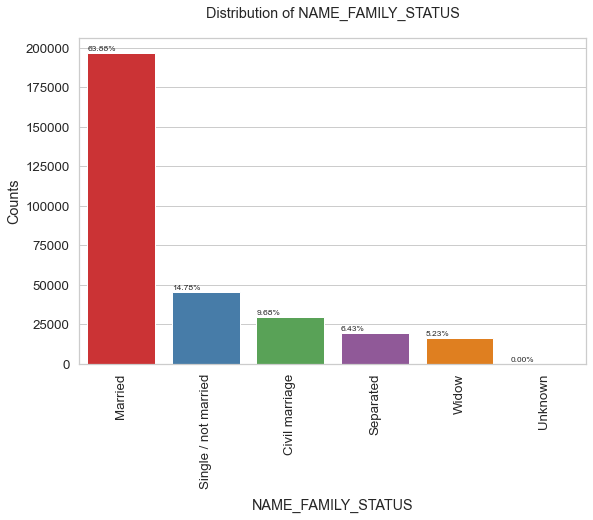

----------------------------------------------------------------------------------------------------


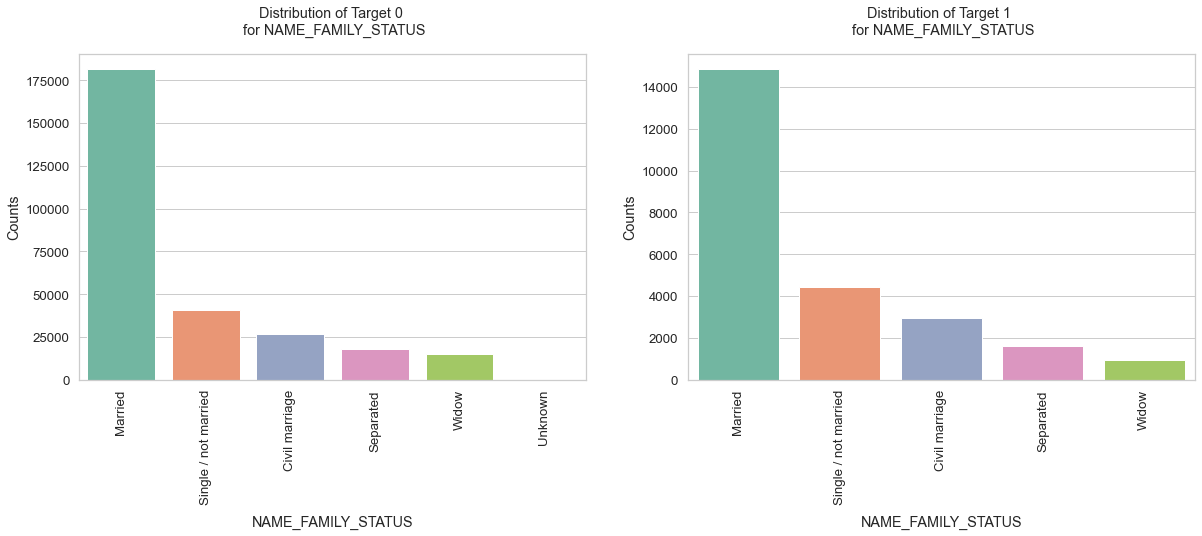

In [214]:
print_unique_categories(df_train, 'NAME_FAMILY_STATUS', show_counts=True)

plot_categorical_variables_bar(df_train, column_name = 'NAME_FAMILY_STATUS', figsize = (20,6), rotation = 90)

plot_categorical_variables_bar_target(df_train, column_name = 'NAME_FAMILY_STATUS', figsize = (20,6), rotation = 90)
print('-'*100)

----------------------------------------------------------------------------------------------------
The unique categories of 'CNT_CHILDREN' are:
[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
----------------------------------------------------------------------------------------------------
Counts of each category are:
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64
----------------------------------------------------------------------------------------------------
Counts of Target 0 are:
0     198762
1      55665
2      24416
3       3359
4        374
5         77
6         15
7          7
14         3
19         2
12         2
10         2
8          2
Name: CNT_CHILDREN, dtype: int64
----------------------------------------------------------------------------------------------------
Counts of Target 1 ar

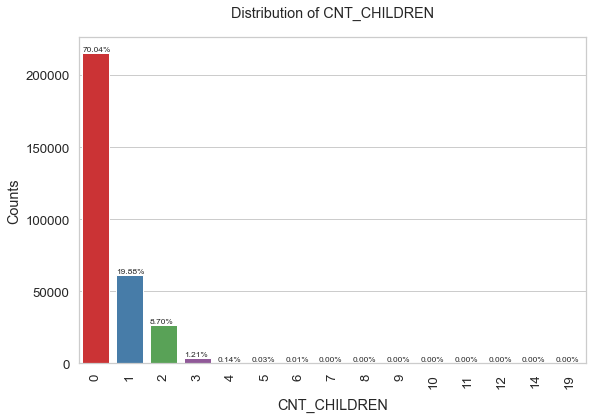

----------------------------------------------------------------------------------------------------


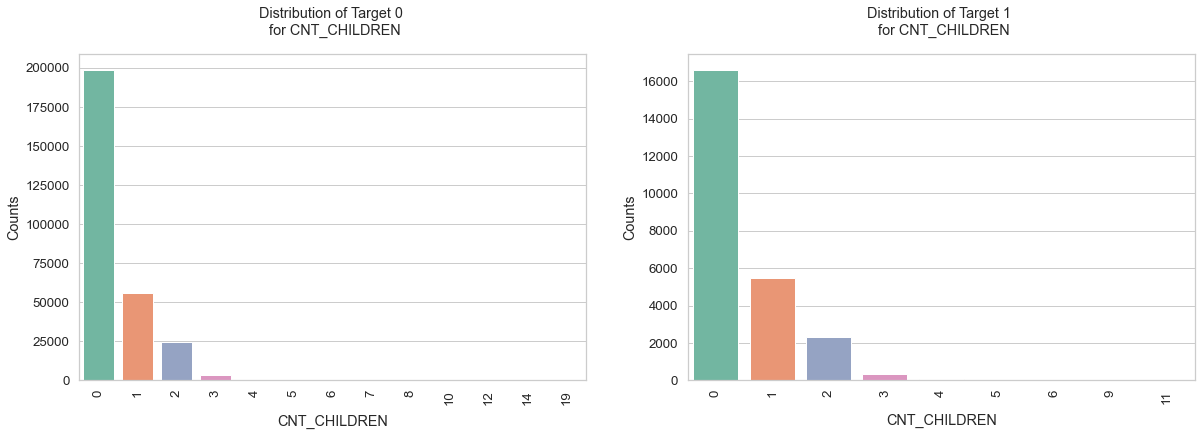

In [215]:
print_unique_categories(df_train, 'CNT_CHILDREN', show_counts=True)

plot_categorical_variables_bar(df_train, column_name = 'CNT_CHILDREN', figsize = (20,6), rotation = 90)

plot_categorical_variables_bar_target(df_train, column_name = 'CNT_CHILDREN', figsize = (20,6), rotation = 90)
print('-'*100)

----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_INCOME_TYPE' are:
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
----------------------------------------------------------------------------------------------------
Counts of each category are:
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
----------------------------------------------------------------------------------------------------
Counts of Target 0 are:
Working                 143550
Commercial associate     66257
Pensioner                52380
State servant            20454
Student                     18
Unemployed                  14
Busin

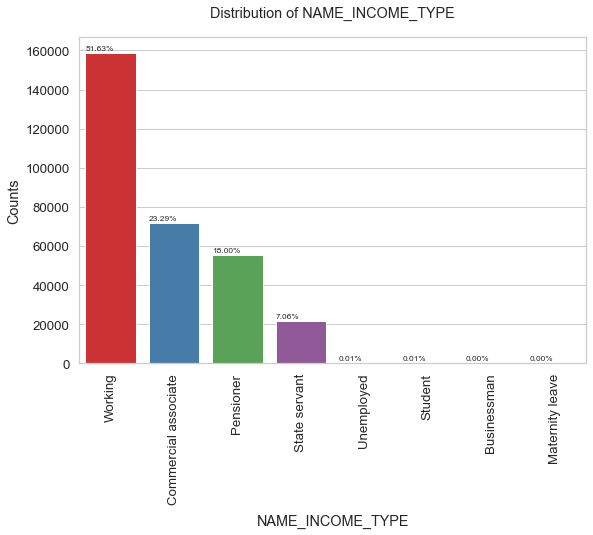

----------------------------------------------------------------------------------------------------


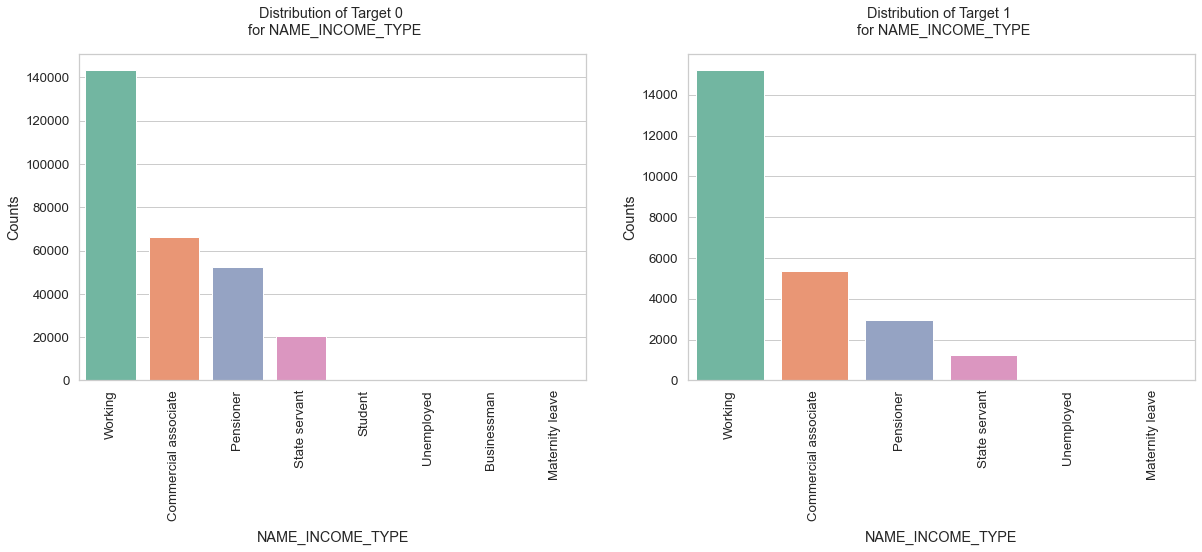

In [216]:
print_unique_categories(df_train, 'NAME_INCOME_TYPE', show_counts=True)

plot_categorical_variables_bar(df_train, column_name = 'NAME_INCOME_TYPE', figsize = (20,6), rotation = 90)

plot_categorical_variables_bar_target(df_train, column_name = 'NAME_INCOME_TYPE', figsize = (20,6), rotation = 90)
print('-'*100)

----------------------------------------------------------------------------------------------------
The unique categories of 'OCCUPATION_TYPE' are:
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
----------------------------------------------------------------------------------------------------
Counts of each category are:
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff    

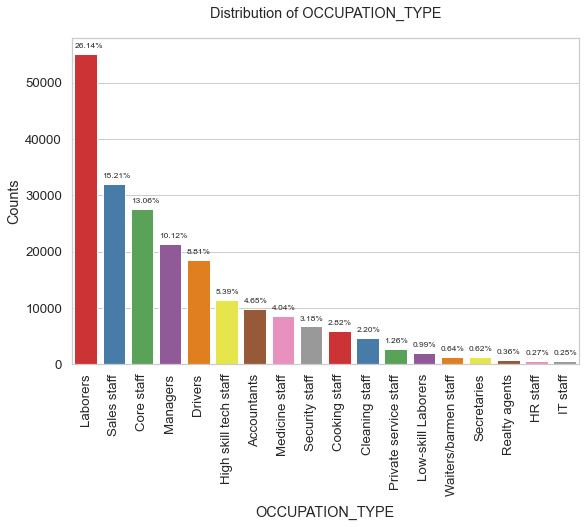

----------------------------------------------------------------------------------------------------


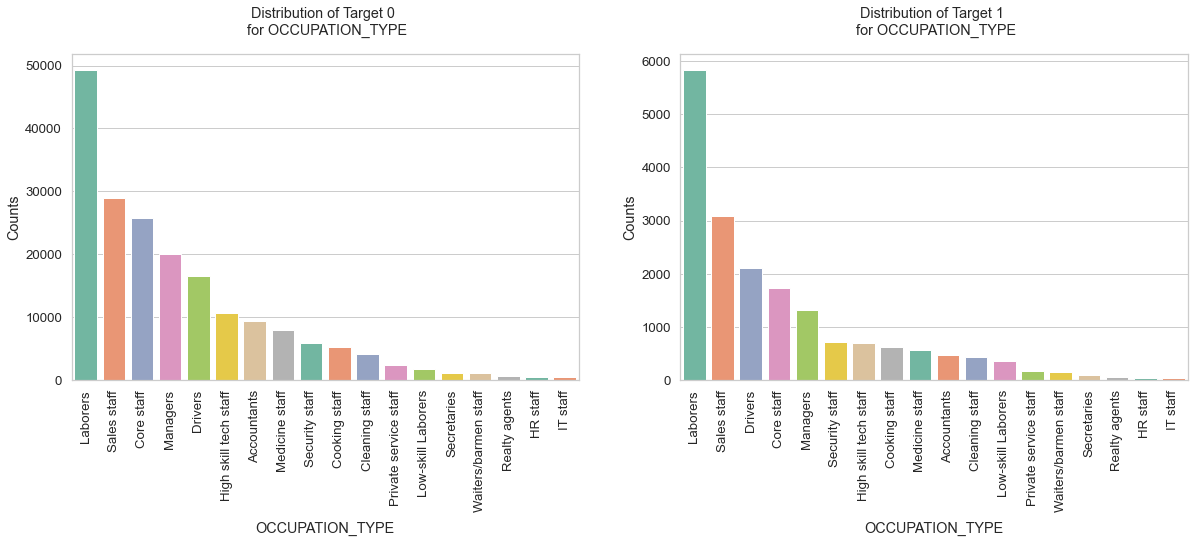

In [217]:
print_unique_categories(df_train, 'OCCUPATION_TYPE', show_counts=True)

plot_categorical_variables_bar(df_train, column_name = 'OCCUPATION_TYPE', figsize = (20,6), rotation = 90)

plot_categorical_variables_bar_target(df_train, column_name = 'OCCUPATION_TYPE', figsize = (20,6), rotation = 90)
print('-'*100)

----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_EDUCATION_TYPE' are:
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
----------------------------------------------------------------------------------------------------
Counts of each category are:
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
----------------------------------------------------------------------------------------------------
Counts of Target 0 are:
Secondary / secondary special    198867
Higher education                  70854
Incomplete higher                  9405
Lower secondary                    3399
Academic degree                     161
Name: NAME_EDUCATION_TYPE, dtype: int64
--

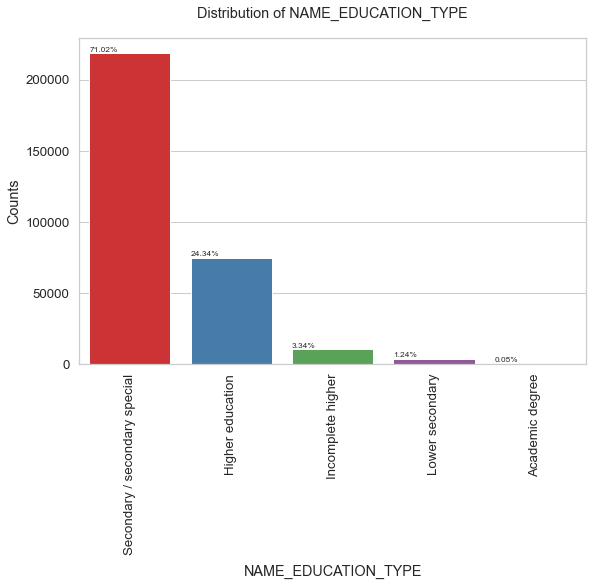

----------------------------------------------------------------------------------------------------


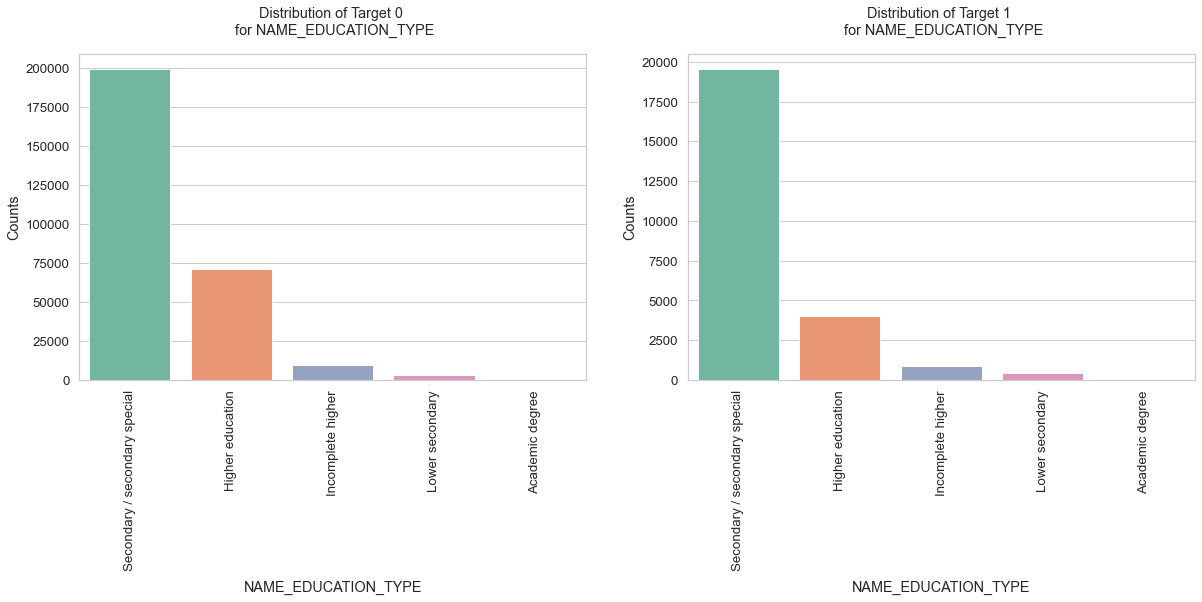

In [218]:
print_unique_categories(df_train, 'NAME_EDUCATION_TYPE', show_counts=True)

plot_categorical_variables_bar(df_train, column_name = 'NAME_EDUCATION_TYPE', figsize = (20,6), rotation = 90)

plot_categorical_variables_bar_target(df_train, column_name = 'NAME_EDUCATION_TYPE', figsize = (20,6), rotation = 90)
print('-'*100)

----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_HOUSING_TYPE' are:
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
----------------------------------------------------------------------------------------------------
Counts of each category are:
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64
----------------------------------------------------------------------------------------------------
Counts of Target 0 are:
House / apartment      251596
With parents            13104
Municipal apartment     10228
Rented apartment         4280
Office apartment         2445
Co-op apartment          1033
Name: NAME_HOUSING_TYPE, dtype: int64
------------------------------------------

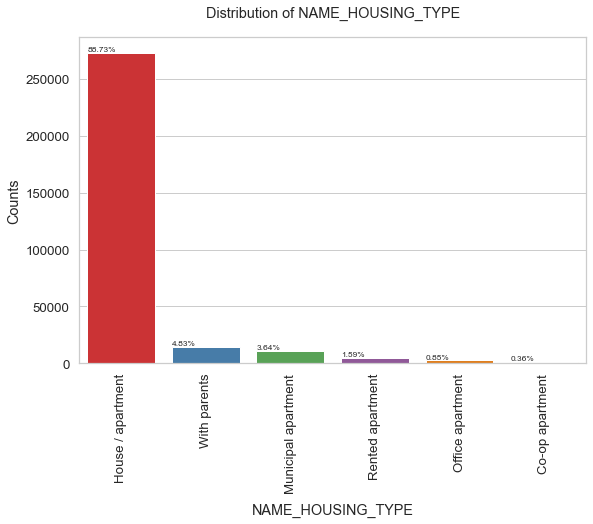

----------------------------------------------------------------------------------------------------


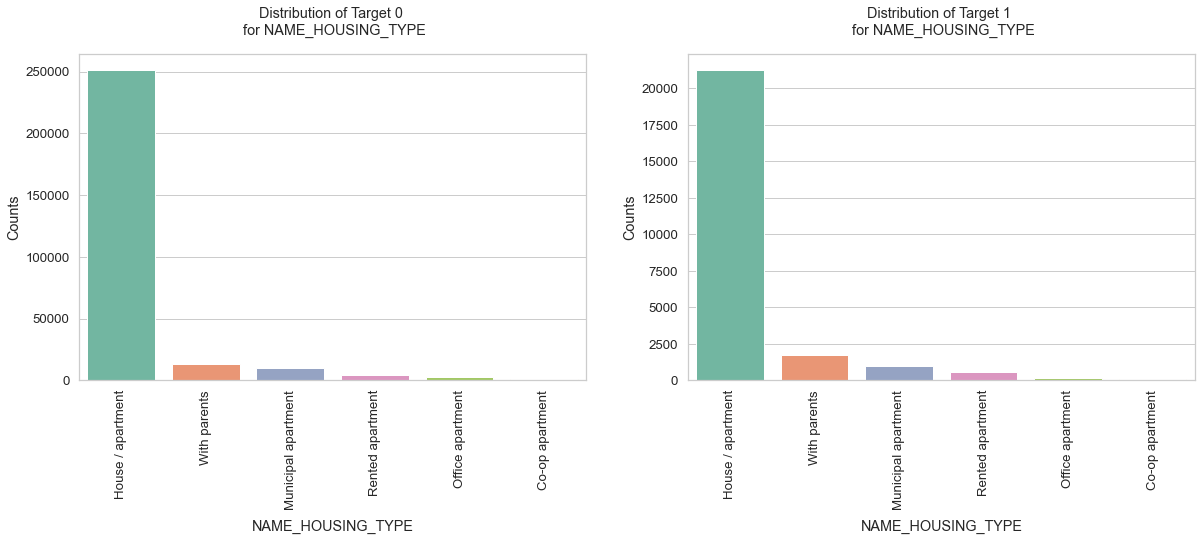

In [219]:
print_unique_categories(df_train, 'NAME_HOUSING_TYPE', show_counts=True)

plot_categorical_variables_bar(df_train, column_name = 'NAME_HOUSING_TYPE', figsize = (20,6), rotation = 90)

plot_categorical_variables_bar_target(df_train, column_name = 'NAME_HOUSING_TYPE', figsize = (20,6), rotation = 90)
print('-'*100)

----------------------------------------------------------------------------------------------------
The unique categories of 'CNT_FAM_MEMBERS' are:
[ 1.  2.  3.  4.  5.  6.  9.  7.  8. 10. 13. nan 14. 12. 20. 15. 16. 11.]
----------------------------------------------------------------------------------------------------
Counts of each category are:
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64
----------------------------------------------------------------------------------------------------
Counts of Target 0 are:
2.0     146348
1.0      62172
3.0      47993
4.0      22561
5.0       3151
6.0        353
7.0         75
8.0         14
9.0          6
12.0         2
20.0         2
10.0         2
16.0         2
14.0         2
15.0         1
Name: 

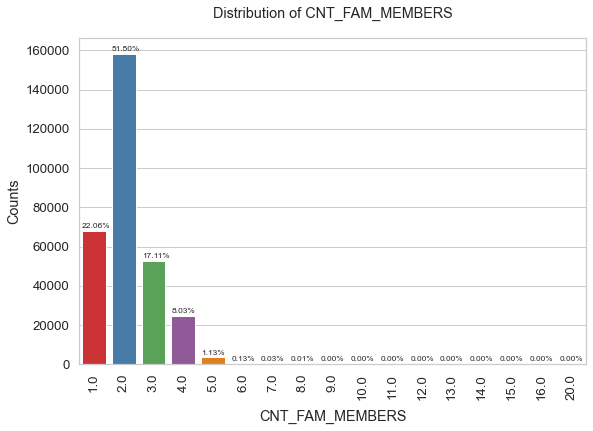

----------------------------------------------------------------------------------------------------


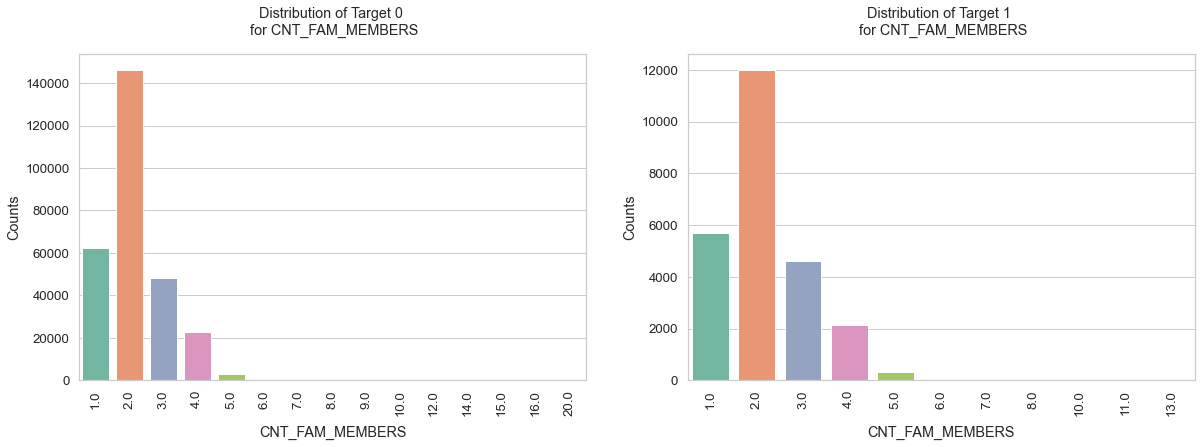

In [220]:
print_unique_categories(df_train, 'CNT_FAM_MEMBERS', show_counts=True)

plot_categorical_variables_bar(df_train, column_name = 'CNT_FAM_MEMBERS', figsize = (20,6), rotation = 90)

plot_categorical_variables_bar_target(df_train, column_name = 'CNT_FAM_MEMBERS', figsize = (20,6), rotation = 90)
print('-'*100)

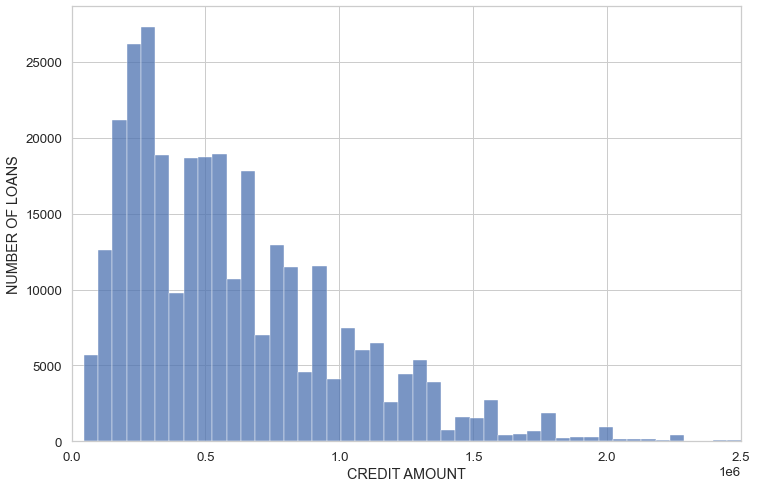

In [221]:
plot = sns.histplot(x='AMT_CREDIT', data=df_train, bins=75)
plot.set_xlim(0, 2500000)
plot.set_xlabel('CREDIT AMOUNT')
plot.set_ylabel('NUMBER OF LOANS')
plt.gcf().set_size_inches(12, 8)
plt.show()

In [222]:
df_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [223]:
df_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [224]:
# Show the distinct categories in each categorical feature

def get_uniques(col):
    if pd.api.types.is_object_dtype(col.dtype):
        print(f"The unique values for {col.name} are:\n")
        print(col.unique())
        print()
    
_ = df_train.apply(get_uniques, axis=0)

The unique values for NAME_CONTRACT_TYPE are:

['Cash loans' 'Revolving loans']

The unique values for CODE_GENDER are:

['M' 'F' 'XNA']

The unique values for FLAG_OWN_CAR are:

['N' 'Y']

The unique values for FLAG_OWN_REALTY are:

['Y' 'N']

The unique values for NAME_TYPE_SUITE are:

['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

The unique values for NAME_INCOME_TYPE are:

['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

The unique values for NAME_EDUCATION_TYPE are:

['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

The unique values for NAME_FAMILY_STATUS are:

['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

The unique values for NAME_HOUSING_TYPE are:

['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartm

In [225]:
X = df_train.drop("TARGET", axis=1)

# Select categorical columns
categorical_cols = X.select_dtypes("object").columns

# Select numerical columns
numerical_cols = X.select_dtypes(exclude="object").columns

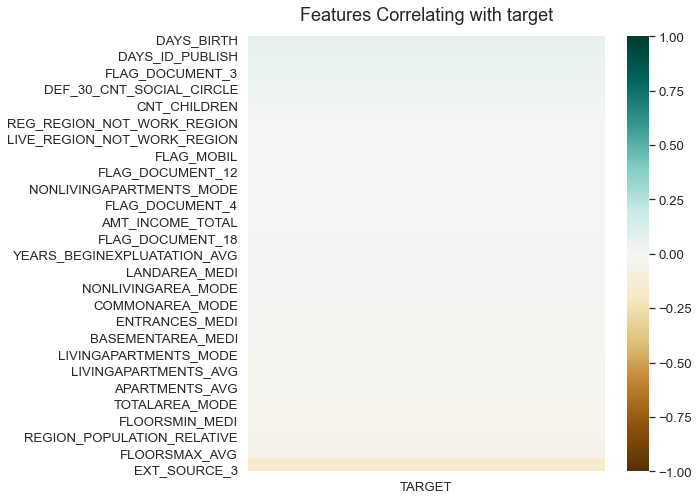

In [226]:
# Plot feature correlations with target

plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(
    df_train.corr()[["TARGET"]].sort_values(by="TARGET", ascending=False)[1:],
    vmin=-1,
    vmax=1,
    cmap="BrBG",
)

heatmap.set_title("Features Correlating with target", fontdict={"fontsize": 18}, pad=16)
plt.show()

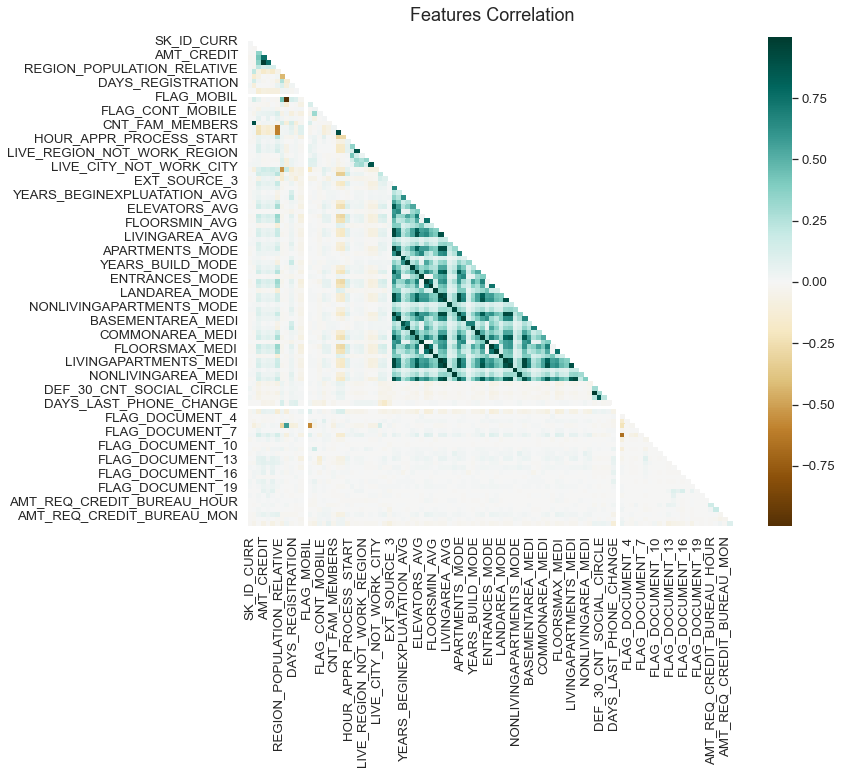

In [227]:
corr_data = df_train[numerical_cols].dropna().corr()

# Set up a custom shape mask
mask = np.triu(np.ones_like(corr_data, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr_data,
    mask=mask,
    cmap="BrBG",
    center=0,
    square=True,
)

plt.title("Features Correlation", fontdict={"fontsize": 18}, pad=16)

plt.show()

In [228]:
# Checking for correlations in all of the data
corrs = (
    df_train[numerical_cols]
    .corr()
    .abs()
    .unstack()
    .sort_values(kind="quicksort", ascending=False)
    .reset_index()
)

corrs = (
    corrs[corrs["level_0"] != corrs["level_1"]][::2]
    .reset_index(drop=True)
    .dropna()
    .rename(columns={0: "absolute_correlation"})
)

In [229]:
corrs.head(5)

,level_0,level_1,absolute_correlation
0,FLAG_EMP_PHONE,DAYS_EMPLOYED,0.999755
1,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,0.998495
2,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998490
3,FLOORSMIN_AVG,FLOORSMIN_MEDI,0.997241
4,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997034


In [230]:
corrs.tail(5)

,level_0,level_1,absolute_correlation
5420,AMT_REQ_CREDIT_BUREAU_QRT,ENTRANCES_MEDI,0.000008
5421,FLAG_DOCUMENT_4,YEARS_BEGINEXPLUATATION_AVG,0.000007
5422,YEARS_BEGINEXPLUATATION_MODE,FLAG_DOCUMENT_4,0.000005
5423,FLAG_DOCUMENT_12,FLAG_MOBIL,0.000005
5424,BASEMENTAREA_MODE,AMT_REQ_CREDIT_BUREAU_HOUR,0.000004


In [231]:
print("there are", corrs[corrs["absolute_correlation"] >= 0.95].shape[0],"features with very high correlations (>=95%)")
corrs[corrs["absolute_correlation"] >= 0.95]

there are 46 features with very high correlations (>=95%)


,level_0,level_1,absolute_correlation
0,FLAG_EMP_PHONE,DAYS_EMPLOYED,0.999755
1,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,0.998495
2,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998490
3,FLOORSMIN_AVG,FLOORSMIN_MEDI,0.997241
4,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997034
5,ENTRANCES_MEDI,ENTRANCES_AVG,0.996886
6,ELEVATORS_MEDI,ELEVATORS_AVG,0.996099
7,COMMONAREA_AVG,COMMONAREA_MEDI,0.995978
8,LIVINGAREA_MEDI,LIVINGAREA_AVG,0.995596
9,APARTMENTS_MEDI,APARTMENTS_AVG,0.995081


In [232]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("imputer", SimpleImputer()),
    ]
)

# Preprocessing for categorical data
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)

In [233]:
def cross_val_roc_auc(pipeline: Pipeline, X: pd.DataFrame, y: pd.Series) -> np.float64:
    """
    Returns cross validated area under the receiver operating characteristic curve to estimate Kaggle score

    Args:
        pipeline (sklearn.pipeline.Pipeline): Pipeline to test
        X (pd.DataFrame): Feature values
        y (pd.Series): Target values

    Returns:
        np.float64: Cross validated area under the receiver operating characteristic curve
    """

    score = cross_val_score(pipeline, X, y, cv=5, scoring="roc_auc")

    return np.sqrt(score).mean()

In [242]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [235]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, max_iter=1000)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", lr)])

In [236]:
y = df_train["TARGET"]
y.shape

(307511,)

In [237]:
# Evaluate the model
score = cross_val_roc_auc(my_pipeline, X, y)

print("Cross-validated mean AUCROC:", score)

Cross-validated mean AUCROC: 0.8639043927567599


In [238]:
%%time
my_pipeline.fit(X, y)

Wall time: 2min 55s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_...
                                                  Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_

In [239]:
%%time
preds = my_pipeline.predict_proba(df_test)

Wall time: 538 ms


In [240]:
pd.DataFrame(preds).to_csv("VirtualIntership/hcdr/pred_lr.csv")

In [243]:
# Cross-validated predictions
y_pred = cross_val_predict(my_pipeline, X, y, cv=5)

print(classification_report(y, y_pred))
print ('Precision:', precision_score(y, y_pred, average='weighted')*100)
print ('Recall:', recall_score(y, y_pred, average='weighted')*100)
print ('F1 score:', f1_score(y, y_pred, average='weighted')*100)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    282686
           1       0.47      0.01      0.02     24825

    accuracy                           0.92    307511
   macro avg       0.70      0.51      0.49    307511
weighted avg       0.88      0.92      0.88    307511

Precision: 88.39952445326296
Recall: 91.916061539262
F1 score: 88.24064917990306


In [244]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", rf)])

In [245]:
# Evaluate the model
score = cross_val_roc_auc(my_pipeline, X, y)

print("Cross-validated mean AUCROC:", score)

Cross-validated mean AUCROC: 0.8426924669436289


In [246]:
%%time
my_pipeline.fit(X, y)

Wall time: 7min 27s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_...
                                                  Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_

In [247]:
%%time
preds = my_pipeline.predict_proba(df_test)

Wall time: 6.92 s


In [248]:
pd.DataFrame(preds).to_csv("VirtualIntership/hcdr/pred_rf.csv")

In [249]:
# Cross-validated predictions
y_pred = cross_val_predict(my_pipeline, X, y, cv=5)

print(classification_report(y, y_pred))
print ('Precision:', precision_score(y, y_pred, average='weighted')*100)
print ('Recall:', recall_score(y, y_pred, average='weighted')*100)
print ('F1 score:', f1_score(y, y_pred, average='weighted')*100)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    282686
           1       0.85      0.00      0.00     24825

    accuracy                           0.92    307511
   macro avg       0.89      0.50      0.48    307511
weighted avg       0.91      0.92      0.88    307511

Precision: 91.39949334656968
Recall: 91.93492265317337
F1 score: 88.08280970645164
